# Exploring World Bank Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Duplicate key in file '/Users/efloch/.matplotlib/matplotlibrc' line #2.


In [2]:
df = pd.read_csv("data/raw/training.csv")
df.head(3)

,Unnamed: 0,1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],...,2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],Country Name,Series Code,Series Name
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.769214,Afghanistan,allsi.bi_q1,(%) Benefits held by 1st 20% population - All ...
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.027746,Afghanistan,allsp.bi_q1,(%) Benefits held by 1st 20% population - All ...
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.244887,Afghanistan,allsa.bi_q1,(%) Benefits held by 1st 20% population - All ...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195402 entries, 0 to 195401
Data columns (total 40 columns):
Unnamed: 0       195402 non-null int64
1972 [YR1972]    64945 non-null float64
1973 [YR1973]    64443 non-null float64
1974 [YR1974]    64966 non-null float64
1975 [YR1975]    66973 non-null float64
1976 [YR1976]    67717 non-null float64
1977 [YR1977]    69735 non-null float64
1978 [YR1978]    69763 non-null float64
1979 [YR1979]    69906 non-null float64
1980 [YR1980]    75250 non-null float64
1981 [YR1981]    78034 non-null float64
1982 [YR1982]    79016 non-null float64
1983 [YR1983]    78982 non-null float64
1984 [YR1984]    79532 non-null float64
1985 [YR1985]    81017 non-null float64
1986 [YR1986]    81455 non-null float64
1987 [YR1987]    82752 non-null float64
1988 [YR1988]    83242 non-null float64
1989 [YR1989]    86331 non-null float64
1990 [YR1990]    106955 non-null float64
1991 [YR1991]    106991 non-null float64
1992 [YR1992]    112243 non-null float64
1993 [Y

By looking at the information on the training data set, we notice that a lot of values are missing for the earliest years. 

In [4]:
# Standardizing the names for ease of use
column_names = {'Country Name':'country', 'Series Code':'code', 'Series Name':'indicator'}
df = (df.rename(columns = column_names)
      .drop('Unnamed: 0',1))
l_countries = list(df['country'].unique())
print("Number of countries :",len(l_countries))

Number of countries : 214


In [5]:
df[['code', 'indicator']].drop_duplicates().describe()

,code,indicator
count,1305,1305
unique,1305,1305
top,SH.XPD.PRIV.ZS,"School enrollment, tertiary (% gross)"
freq,1,1


We see that each code is associated with one name. 

In [6]:
l_series = list(df['indicator'].unique())
print("Number of distinct indicator :",len(l_series))

Number of distinct indicator : 1305


## Exploring by indicator and by country

We now want to see if all countries are represented the same in this dataset. To do this,
we'll look at how many record is given by country by indicator.

In [7]:
year_columns = [col for col in df.columns if col not in column_names.values()]
df_melt = pd.melt(df, id_vars=column_names.values(), value_vars=year_columns, 
                         var_name='year')
df_melt['available'] = df_melt['value'].notnull().astype(int)
df_melt['year'] = df_melt['year'].apply(lambda x: x[:4]).astype(int)
df_melt

,country,code,indicator,year,value,available
0,Afghanistan,allsi.bi_q1,(%) Benefits held by 1st 20% population - All ...,1972,NaN,0
1,Afghanistan,allsp.bi_q1,(%) Benefits held by 1st 20% population - All ...,1972,NaN,0
2,Afghanistan,allsa.bi_q1,(%) Benefits held by 1st 20% population - All ...,1972,NaN,0
3,Afghanistan,allsi.gen_pop,(%) Generosity of All Social Insurance,1972,NaN,0
4,Afghanistan,allsp.gen_pop,(%) Generosity of All Social Protection,1972,NaN,0
...,...,...,...,...,...,...
7034467,Zimbabwe,SG.VAW.BURN.ZS,Women who believe a husband is justified in be...,2007,NaN,0
7034468,Zimbabwe,SG.VAW.GOES.ZS,Women who believe a husband is justified in be...,2007,NaN,0
7034469,Zimbabwe,SG.VAW.NEGL.ZS,Women who believe a husband is justified in be...,2007,NaN,0
7034470,Zimbabwe,SG.VAW.REFU.ZS,Women who believe a husband is justified in be...,2007,NaN,0


In [8]:
df_counts = df_melt.copy()
df_counts['country_record'] = df_counts.groupby('country')['available'].transform('sum')
df_counts['indicator_record'] = df_counts.groupby('indicator')['available'].transform('sum')
df_counts['year_record'] = df_counts.groupby('year')['available'].transform('sum')

df_counts.head(3)

,country,code,indicator,year,value,available,country_record,indicator_record,year_record
0,Afghanistan,allsi.bi_q1,(%) Benefits held by 1st 20% population - All ...,1972,NaN,0,10034,34,64945
1,Afghanistan,allsp.bi_q1,(%) Benefits held by 1st 20% population - All ...,1972,NaN,0,10034,37,64945
2,Afghanistan,allsa.bi_q1,(%) Benefits held by 1st 20% population - All ...,1972,NaN,0,10034,33,64945


In [ ]:
sns.lineplot(x = 'year', y = 'value', data=df_counts)
plt.title("Total number of record per year")

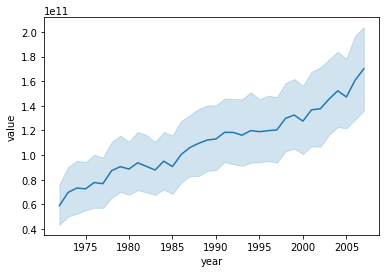